In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder

In [2]:
df = pd.read_csv("/Users/sa10/Downloads/Music-Recommendation-Algorithm/Music-Recommendation-Algorithm/data/train.csv")

In [3]:
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28362 entries, 0 to 28361
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28362 non-null  int64  
 1   artist_name               28362 non-null  object 
 2   track_name                28362 non-null  object 
 3   release_date              28362 non-null  int64  
 4   genre                     28362 non-null  object 
 5   lyrics                    28362 non-null  object 
 6   len                       28362 non-null  int64  
 7   dating                    28362 non-null  float64
 8   violence                  28362 non-null  float64
 9   world/life                28362 non-null  float64
 10  night/time                28362 non-null  float64
 11  shake the audience        28362 non-null  float64
 12  family/gospel             28362 non-null  float64
 13  romantic                  28362 non-null  float64
 14  commun

In [5]:
df.describe()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
count,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000
mean,42948.166878,1990.239652,73.030534,0.021110,0.118371,0.120984,0.057356,0.017418,0.017045,0.048676,0.076651,0.097185,0.060067,0.047417,0.049008,0.024155,0.129402,0.030995,0.425148
std,24747.811462,18.486997,41.831605,0.052366,0.178658,0.172216,0.111892,0.040658,0.041968,0.106071,0.109497,0.181314,0.123346,0.091559,0.089553,0.051032,0.181149,0.071656,0.264100
min,0.000000,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,0.000289,0.000289,0.000284,0.000284,0.000284,0.000284,0.000289,0.014286
25%,20393.500000,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,0.001144,0.001053,0.000975,0.000993,0.000993,0.000957,0.001144,0.000993,0.185714
50%,45407.000000,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,0.001815,0.001815,0.001645,0.001815,0.001645,0.005263,0.001754,0.414286
75%,64089.500000,2007.000000,93.000000,0.004049,0.192538,0.197854,0.065778,0.009989,0.004785,0.042304,0.132111,0.088799,0.055109,0.054373,0.064302,0.025515,0.235115,0.032617,0.642857
max,82451.000000,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,0.992298,0.956938,0.638021,0.667782,0.618073,0.981424,0.958810,1.000000


In [6]:
pivot = df.pivot_table(index='genre', columns='topic', aggfunc='size')

In [7]:
df.pivot_table(index='genre', columns='topic', aggfunc='size')

topic,feelings,music,night/time,obscene,romantic,sadness,violence,world/life
genre,,,,,,,,
blues,147,453,355,605,309,893,1096,745
country,105,592,372,635,299,1571,702,1168
hip hop,2,15,10,696,3,36,97,45
jazz,81,390,220,672,294,726,680,781
pop,140,503,455,1220,430,1701,1240,1349
reggae,56,137,139,647,55,289,586,588
rock,81,213,272,406,133,878,1306,743


This table helps us see the number of songs for each topic and the genres they fall under. We can begin to identify which topics are more popular within each genre, as well as the overall popularity of each genre based on the number of songs. It’s clear that hip hop has the fewest songs in the dataset, which could be attributed to the fact that hip hop is a genre that has gained significant popularity more recently compared to other music genres.

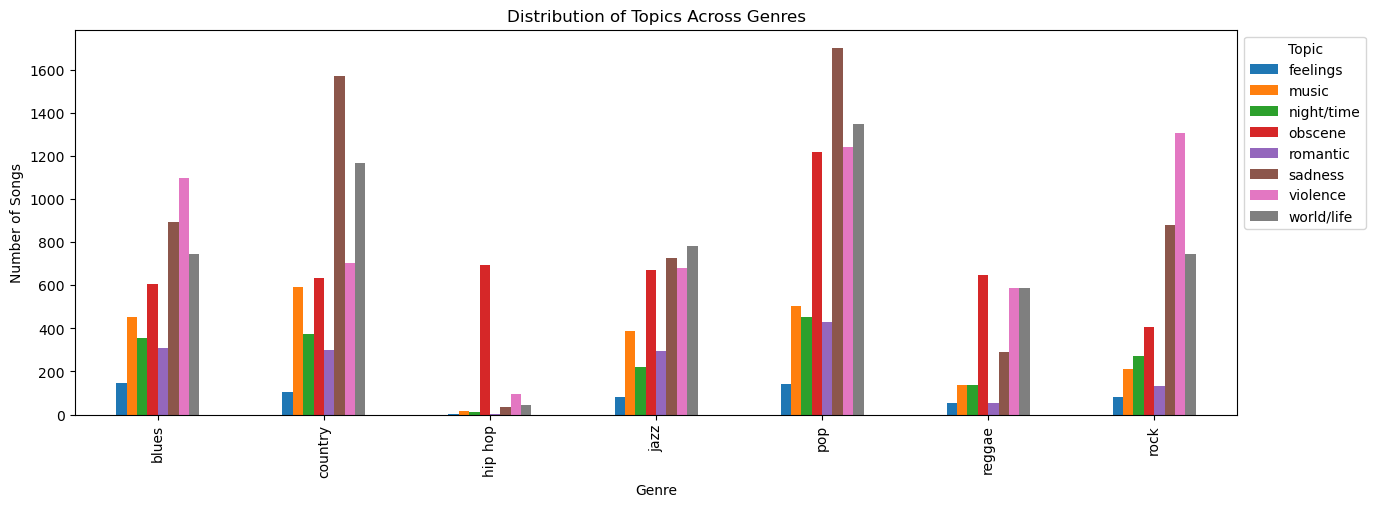

In [8]:
pivot.plot(kind='bar', stacked=False, figsize=(15,5))
plt.title("Distribution of Topics Across Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Songs")
plt.legend(title="Topic", bbox_to_anchor=(1, 1))
plt.show()

When looking at the genre, we can see that there seems to be a mix of the topics within each one. However, there are some more prevalent topics when it comes to certain genres.

Blues – Violence seems to be the highest topic in this genre. It is then followed by sadness and world/life. Feelings is in the minority here, but it seems to be that way with most of the other genres.

Country – Sadness takes the lead, impressively so, but then it is followed by world/life, and then violence. In last again is feelings.

Hip hop – Obscene is in first, almost five times as much obscenity as the following topic, which is violence, and then world/life. Compared to the other genres we see, this genre seems to have a topic that is more heavily focused on, with the number of other topics being a very small portion of this genre.

Jazz – World/life is first, but jazz seems to have a more even distribution of topics, at least for the first four topics. Sadness is second, violence is third, and obscene is fourth, although third and fourth are very close in numbers. The topic of feelings continues to be a minority in all the genres, and jazz is no exception.

Pop – Sadness is in first for pop, followed by world/life and then violence.

Reggae – Obscene is first, followed by what seems to be a tied second of violence and world/life.

Rock – Violence is first, then it’s sadness, and third is world/life.

Feelings was overall in last place for all the genres. It doesn’t seem to be a significant topic that is explored in any genre. The following topics were also not in the top three of any of the genres, although they seem more prominent than feelings: music, night/time, and romantic weren’t as prevalent as the other topics.

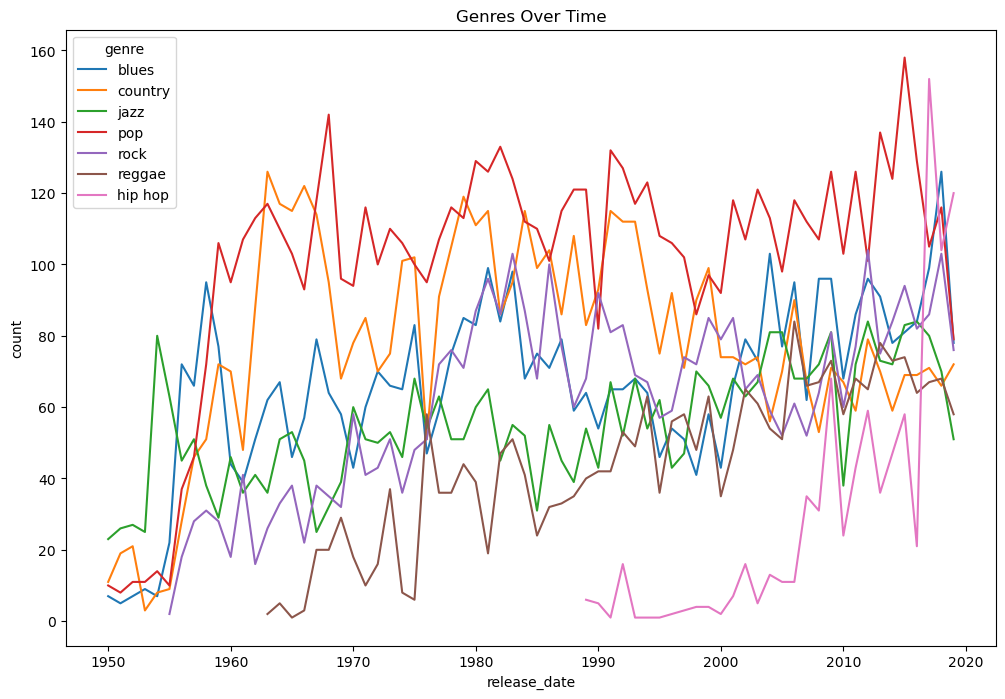

In [10]:
# relase_date and genre
genre_popularity = df.groupby(['release_date', 'genre']).size().reset_index(name='count')

plt.figure(figsize=(12,8))
sns.lineplot(data=genre_popularity, x='release_date', y='count', hue='genre')
plt.title("Genres Over Time")
plt.show()

This graph confirms our previous statement that the rise of hip hop came at a later date, which is why this genre of music appears to be lagging behind in numbers compared to the other genres. However, as hip hop's popularity has increased, several other genres appear to be experiencing a decline. Notably, jazz, pop, rock, reggae, and blues all show downward trends in frequency. In contrast, the only genres with what seems to be a positive trajectory are hip hop and country.

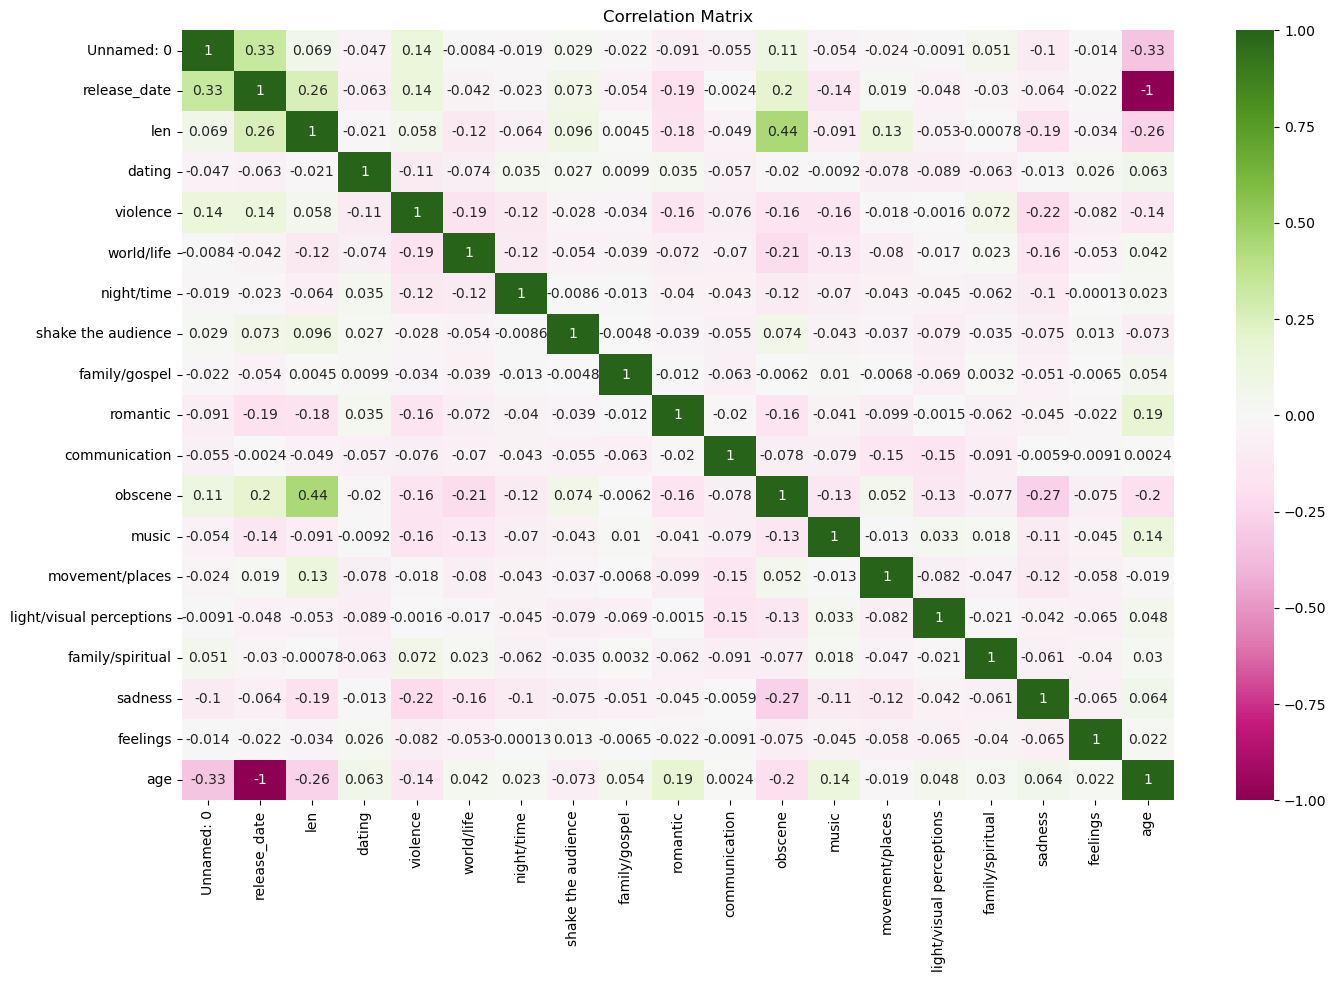

In [11]:
# create heatmap
correlation_matrix = df.corr(numeric_only=True)
# label and title
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG')
plt.title('Correlation Matrix')
# show plot
plt.show()

It is a good idea to remove one of the two features that have the strongest negative correlation. For that reason, release date should be removed, since age can represent the same information in a way that is simpler to understand.
Now, if we look for features with a stronger positive correlation, we can see that length and obscene have a correlation of 0.44, which is the highest among all of them. This could suggest that there isn’t much of a correlation—or at least not a significant one—with most of the other topics.

In [12]:
df.pivot_table(index='topic', columns='len', aggfunc='size')

len,1,2,3,4,5,6,7,8,9,10,...,190,191,192,193,194,195,196,197,198,199
topic,,,,,,,,,,,,,,,,,,,,,
feelings,1.0,1.0,2.0,1.0,1.0,NaN,3.0,2.0,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0
music,NaN,4.0,5.0,6.0,2.0,7.0,10.0,3.0,4.0,2.0,...,NaN,1.0,1.0,NaN,2.0,1.0,NaN,NaN,1.0,NaN
night/time,1.0,3.0,2.0,3.0,1.0,3.0,1.0,1.0,6.0,3.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN
obscene,2.0,1.0,2.0,3.0,1.0,2.0,3.0,3.0,3.0,4.0,...,33.0,24.0,37.0,30.0,24.0,37.0,33.0,29.0,23.0,39.0
romantic,1.0,NaN,NaN,NaN,2.0,NaN,4.0,2.0,3.0,1.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
sadness,NaN,NaN,1.0,3.0,2.0,3.0,2.0,4.0,6.0,9.0,...,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN
violence,NaN,NaN,1.0,3.0,NaN,3.0,3.0,13.0,5.0,3.0,...,4.0,3.0,4.0,2.0,7.0,NaN,2.0,5.0,2.0,5.0
world/life,1.0,2.0,NaN,2.0,2.0,5.0,11.0,1.0,4.0,10.0,...,1.0,1.0,1.0,1.0,1.0,2.0,NaN,5.0,2.0,1.0


When we look at the lower half of the table, we see that obscene music overwhelmingly contains more words than any other topic. Hip hop, having the highest count of obscene lyrics, helps us understand why this is the case. Since hip hop is faster-paced, it tends to have a higher word count on average in order to match the typical length of a song.

<Axes: xlabel='len', ylabel='topic'>

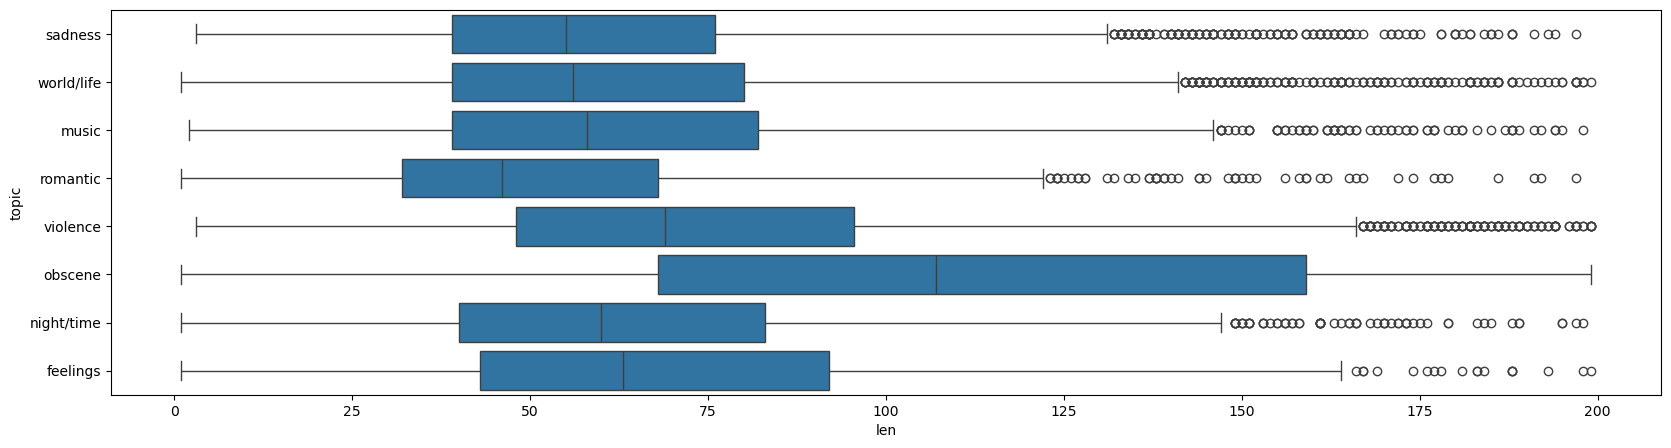

In [13]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x='len', y='topic')

Once again, obscene music has a higher average word count, which is largely influenced by hip hop. All the other topics with similarly high word counts tend to be outliers, so they aren't very comparable.

<Axes: xlabel='genre', ylabel='count'>

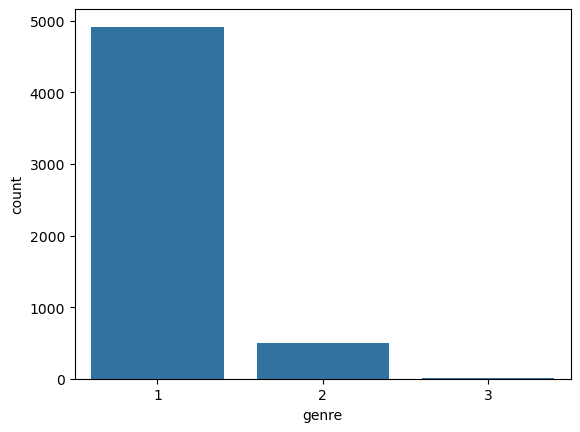

In [14]:
artist_genre = df.groupby('artist_name')['genre'].nunique()
sns.barplot(artist_genre.value_counts())

In this graph, we can see that almost 5,000 of the artists in this dataset tend to focus on only one genre. A bit more than 500 artists do seem to branch out, at most trying out three different genres of music. Since artists tend not to deviate from their genre due to their brand or artistic direction, dropping the names of the artists could be a good move, as there isn’t much they can add in terms of insight.

### Hypothesis
Since there wasn’t a clear direction as to what we had to do or even what it is we are trying to explore, the direction I looked in for my EDA was identifying what columns are necessary to keep and which ones wouldn’t really have that big of an impact on modeling. There seemed to be a bit of repetition, then I worked toward figuring that out. From what I have seen so far, there are quite a few columns I should be able to drop that don’t really impact the data I need to further explore. As I continue on to cleaning the data, dropping categorical values and dropping topics that seem to be repetitive will be the next step.

The conclusions I came to are that there seem to be some stronger correlations with topics and genres, most musical artists tend to stick to a single genre, and few deviate from this. Overall, there isn’t anything that is truly outstanding in this dataset.